In [2]:
import torch
import numpy as np
from utils import prediction,normalization,discrete_missing,continuous_missing,calculate_missing_ratio,get_pseudo_color_img
import time
import matplotlib.pyplot as plt
import random
from skimage.metrics import structural_similarity,peak_signal_noise_ratio

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
assert device.type!='cpu' # Only GPU inference supported currently

Loading models and data

In [3]:
model = torch.jit.load('network/MDA_GAN.pt').to(device).half()
data = normalization(np.load('data/iso_vsp01.npy'))
print('Data shape is', data.shape)

Data shape is (192, 64, 240)


50% discrete missing in inline

iline random discrete missing proportion: 50.0%
The SSIM metric is: 0.9852089185705951
The PSNR metric is: 37.149796149501924


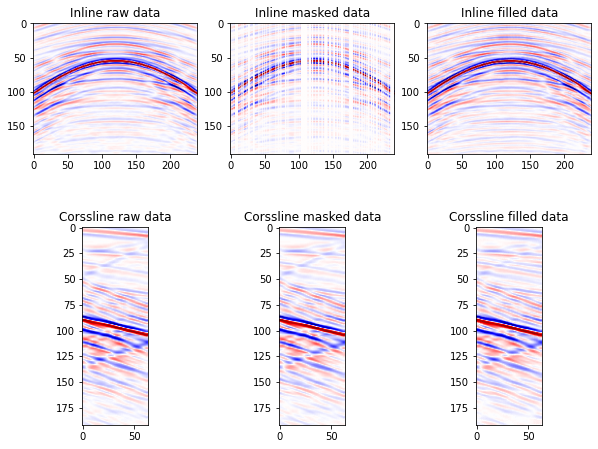

In [4]:
mask = discrete_missing(data, proportions=(0.5,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask) * 0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

75% discrete missing in inline

iline random discrete missing proportion: 75.0%
The SSIM metric is: 0.9754041551941187
The PSNR metric is: 32.8151969641515


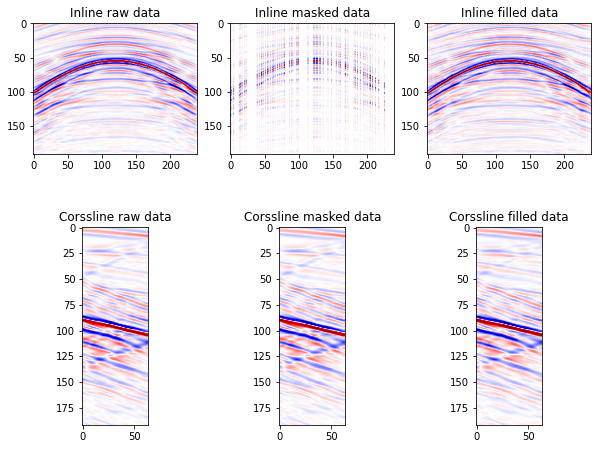

In [6]:
mask = discrete_missing(data, proportions=(0.75,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

90% discrete missing in inline

iline random discrete missing proportion: 90.0%
The SSIM metric is: 0.9600189308120491
The PSNR metric is: 30.99777270341205


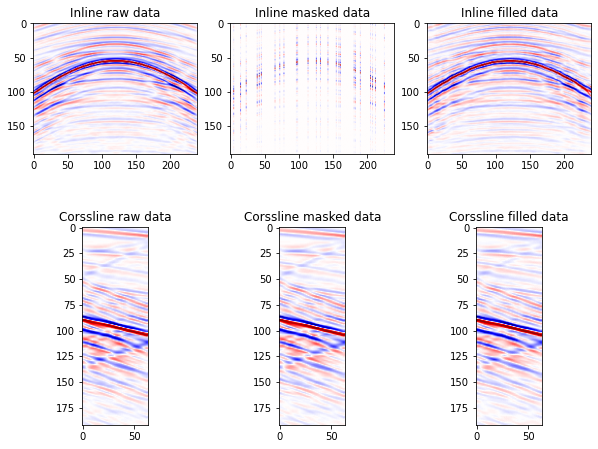

In [7]:
mask = discrete_missing(data, proportions=(0.9,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

95% discrete missing in inline

iline random discrete missing proportion: 95.0%
The SSIM metric is: 0.8872647964642556
The PSNR metric is: 26.296081982302304


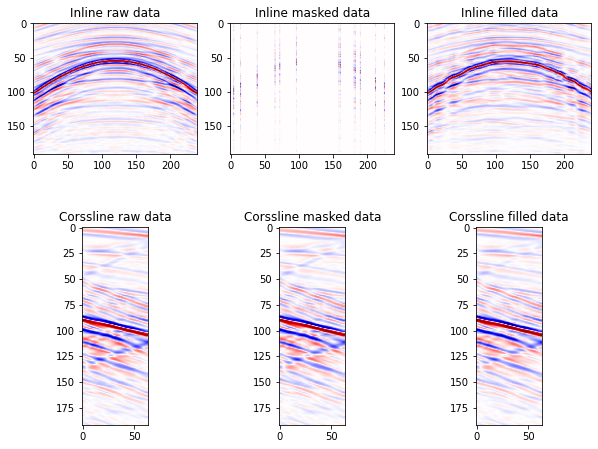

In [8]:
mask = discrete_missing(data, proportions=(0.95,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

50 consecutive missing traces in inline

iline continuous missing traces: 40, missing start trace 100
The SSIM metric is: 0.9740703295088255
The PSNR metric is: 34.778737351337725


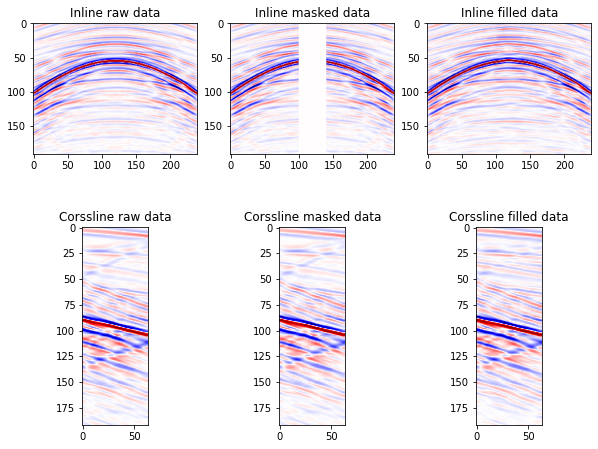

In [9]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(40,), directions=('iline',),start_missing=(100,))

masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

70 consecutive missing traces in inline

iline continuous missing traces: 70, missing start trace 85
The SSIM metric is: 0.9518699887755804
The PSNR metric is: 31.10854884928756


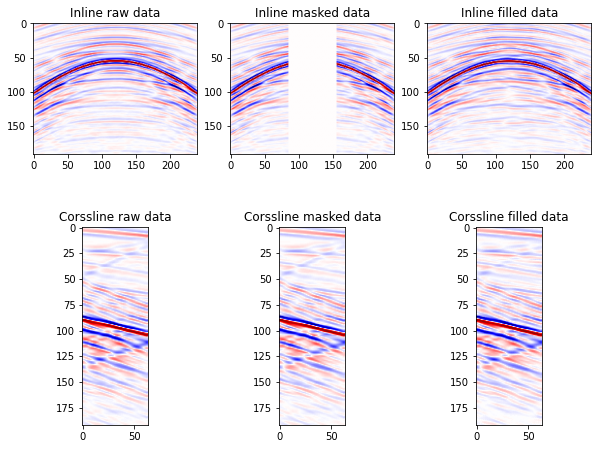

In [10]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(70,), directions=('iline',),start_missing=(85,))

masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

100 consecutive missing traces in inline

iline continuous missing traces: 100, missing start trace 70
The SSIM metric is: 0.8996055486685707
The PSNR metric is: 26.850680925135194


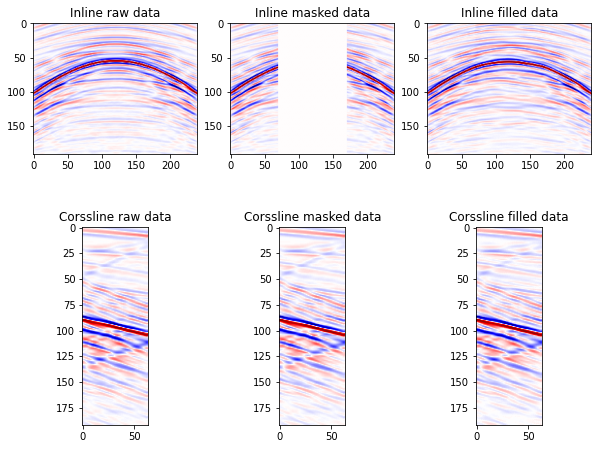

In [11]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(100,), directions=('iline',),start_missing=(70,))

masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

Mixed Missing

iline continuous missing traces: 100, missing start trace 70
iline random discrete missing proportion: 75.0%
The total missing proportion: 85.41666865348816%
The SSIM metric is: 0.8745562007164965
The PSNR metric is: 25.32364112887011


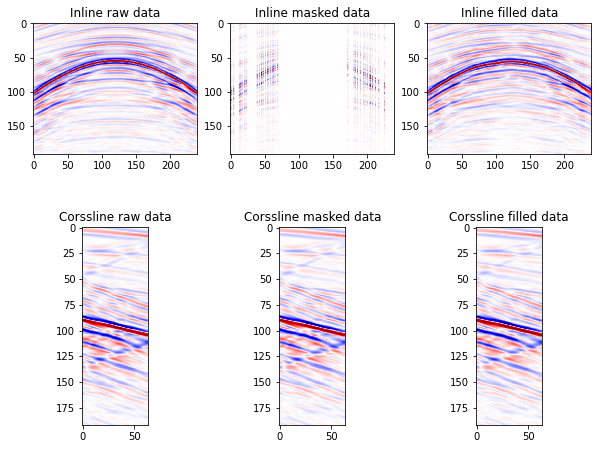

In [12]:
random.seed(2022)
np.random.seed(2022)
mask = continuous_missing(data, num_traces=(100,), directions=('iline',),start_missing=(70,))
mask = discrete_missing(data, proportions=(0.75,), directions=('iline',),show_slices= (-16,),mask = mask)

print('The total missing proportion:',f'{calculate_missing_ratio(mask)*100}%')
masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)